<a href="https://colab.research.google.com/github/karthyick/ai_ml_projects/blob/main/Vanishing_Gradient_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3506530738.py:249: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.08, 1, 0.98])
/tmp/ipython-input-3506530738.py:249: UserWarning: Glyph 128310 (\N{LARGE ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.08, 1, 0.98])
/tmp/ipython-input-3506530738.py:249: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.08, 1, 0.98])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128310 (\N{LARGE ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY C

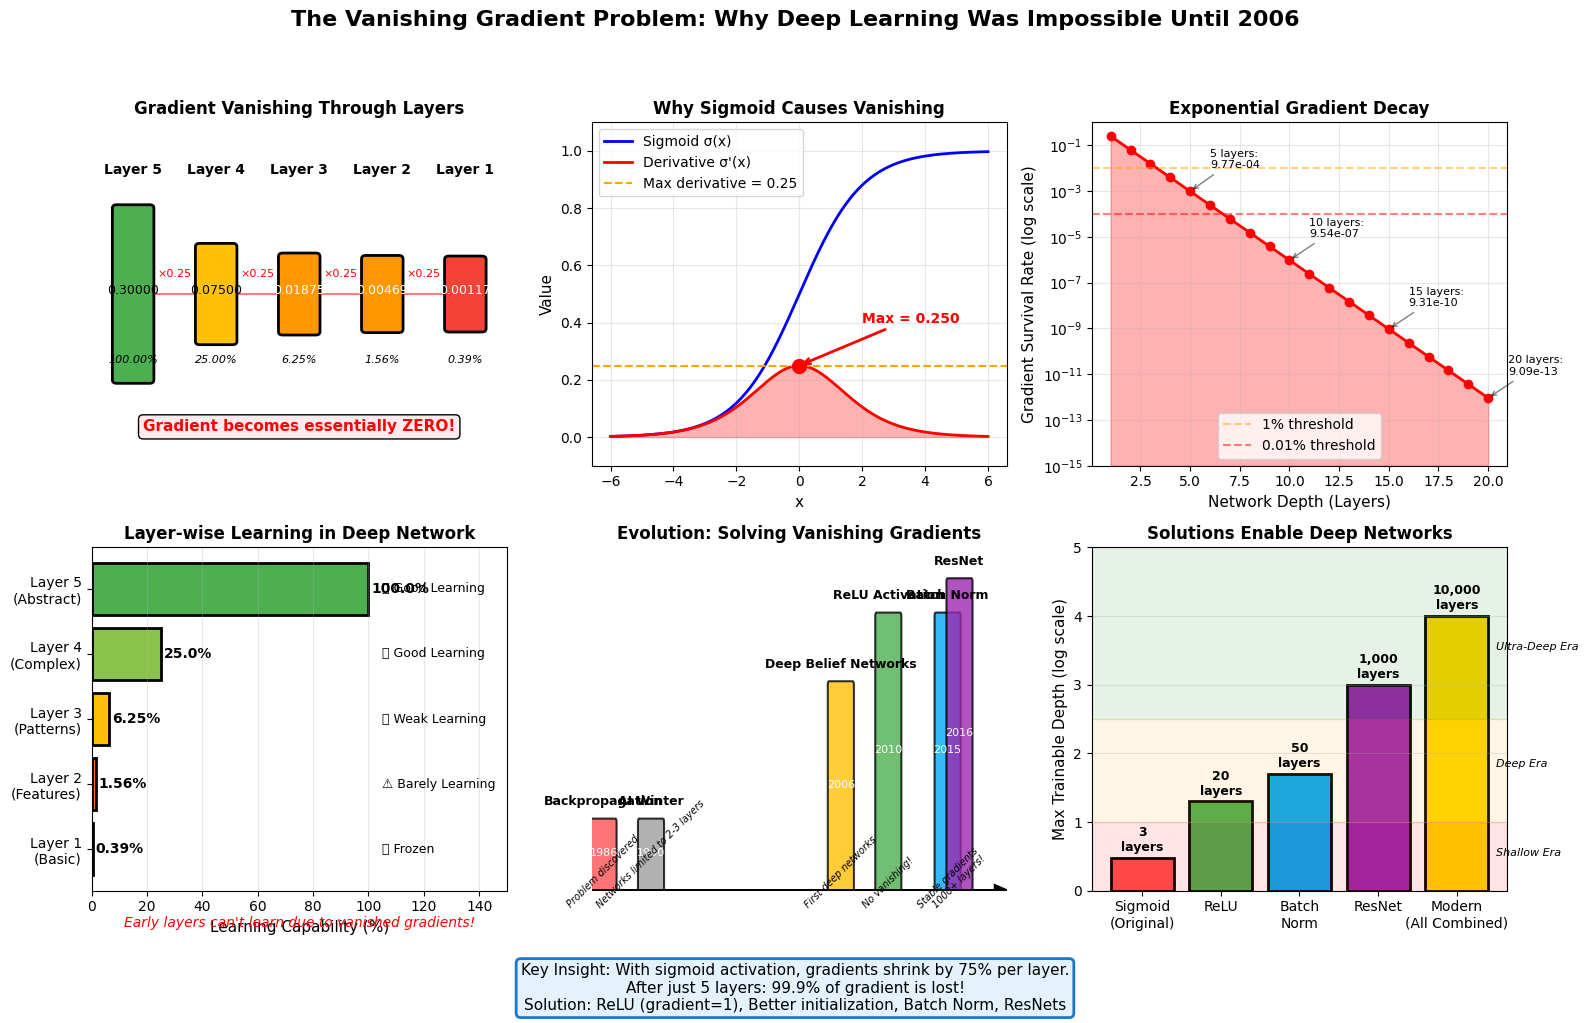


THE VANISHING GRADIENT PROBLEM - COMPLETE ANALYSIS

🔴 THE PROBLEM:
----------------------------------------
With sigmoid activation: σ'(x) ≤ 0.25
Gradient after n layers: error × (0.25)^n
After 5 layers: 0.00098 (0.098% survives)
After 10 layers: 0.0000009537 (0.0000095% survives)
After 20 layers: 9.09e-13 (essentially ZERO!)

📊 EMPLOYEE E005 EXAMPLE:
----------------------------------------
Output Error: 0.3
Layer 5 gradient: 0.300000 (100.00% of original)
Layer 4 gradient: 0.075000 (25.00% of original)
Layer 3 gradient: 0.018750 (6.25% of original)
Layer 2 gradient: 0.004690 (1.56% of original)
Layer 1 gradient: 0.001170 (0.39% of original)

🚫 WHY THIS PREVENTED DEEP LEARNING:
----------------------------------------
1. Early layers extract basic features but can't learn
2. Only last 2-3 layers actually train
3. Complex hierarchical features impossible to learn
4. Networks limited to shallow architectures

✅ THE SOLUTIONS (2006-2016):
----------------------------------------
1. ReLU

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyBboxPatch, Circle
import matplotlib.patches as mpatches

# Set up the figure
fig = plt.figure(figsize=(16, 10))

# ==============================================================================
# VISUALIZATION 1: Gradient Flow Through Layers
# ==============================================================================
ax1 = plt.subplot(2, 3, 1)
ax1.set_title('Gradient Vanishing Through Layers', fontsize=12, fontweight='bold')
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.axis('off')

# Draw network layers
layers = 5
layer_positions = np.linspace(1, 9, layers)
gradient_values = [0.3, 0.075, 0.01875, 0.00469, 0.00117]
gradient_percentages = [100, 25, 6.25, 1.56, 0.39]

for i, (pos, grad, perc) in enumerate(zip(layer_positions, gradient_values, gradient_percentages)):
    # Color based on gradient strength
    if perc > 50:
        color = '#4CAF50'
    elif perc > 10:
        color = '#FFC107'
    elif perc > 1:
        color = '#FF9800'
    else:
        color = '#F44336'

    # Draw layer
    height = 2 + grad * 10  # Height proportional to gradient
    rect = FancyBboxPatch((pos-0.4, 5-height/2), 0.8, height,
                          boxstyle="round,pad=0.1",
                          facecolor=color, edgecolor='black', linewidth=2)
    ax1.add_patch(rect)

    # Add labels
    ax1.text(pos, 8.5, f'Layer {5-i}', ha='center', fontsize=10, fontweight='bold')
    ax1.text(pos, 5, f'{grad:.5f}', ha='center', fontsize=9, color='white' if perc < 10 else 'black')
    ax1.text(pos, 3, f'{perc:.2f}%', ha='center', fontsize=8, style='italic')

    # Draw gradient flow arrow
    if i < layers - 1:
        ax1.arrow(pos + 0.5, 5, layer_positions[i+1] - pos - 1, 0,
                 head_width=0.3, head_length=0.2, fc='red', ec='red', alpha=0.5)
        ax1.text((pos + layer_positions[i+1])/2, 5.5, '×0.25',
                ha='center', fontsize=8, color='red')

ax1.text(5, 1, 'Gradient becomes essentially ZERO!',
         ha='center', fontsize=11, color='red', fontweight='bold',
         bbox=dict(boxstyle="round", facecolor='#FFEBEE'))

# ==============================================================================
# VISUALIZATION 2: Sigmoid Derivative Problem
# ==============================================================================
ax2 = plt.subplot(2, 3, 2)

# Sigmoid and its derivative
x = np.linspace(-6, 6, 1000)
sigmoid = 1 / (1 + np.exp(-x))
sigmoid_derivative = sigmoid * (1 - sigmoid)

ax2.plot(x, sigmoid, 'b-', linewidth=2, label='Sigmoid σ(x)')
ax2.plot(x, sigmoid_derivative, 'r-', linewidth=2, label="Derivative σ'(x)")
ax2.axhline(y=0.25, color='orange', linestyle='--', label='Max derivative = 0.25')
ax2.fill_between(x, 0, sigmoid_derivative, alpha=0.3, color='red')

ax2.set_xlabel('x', fontsize=11)
ax2.set_ylabel('Value', fontsize=11)
ax2.set_title('Why Sigmoid Causes Vanishing', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left')
ax2.set_ylim(-0.1, 1.1)

# Annotate maximum
max_idx = np.argmax(sigmoid_derivative)
ax2.scatter([x[max_idx]], [sigmoid_derivative[max_idx]], s=100, c='red', zorder=5)
ax2.annotate(f'Max = {sigmoid_derivative[max_idx]:.3f}',
            xy=(x[max_idx], sigmoid_derivative[max_idx]),
            xytext=(2, 0.4),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=10, color='red', fontweight='bold')

# ==============================================================================
# VISUALIZATION 3: Gradient Decay by Network Depth
# ==============================================================================
ax3 = plt.subplot(2, 3, 3)

depths = np.arange(1, 21)
gradient_survival = 0.25 ** depths

ax3.semilogy(depths, gradient_survival, 'ro-', linewidth=2, markersize=6)
ax3.fill_between(depths, gradient_survival, 1e-15, alpha=0.3, color='red')

# Mark critical points
ax3.axhline(y=0.01, color='orange', linestyle='--', alpha=0.5, label='1% threshold')
ax3.axhline(y=0.0001, color='red', linestyle='--', alpha=0.5, label='0.01% threshold')

# Add annotations for specific depths
for d in [5, 10, 15, 20]:
    val = 0.25 ** d
    ax3.annotate(f'{d} layers:\n{val:.2e}',
                xy=(d, val), xytext=(d+1, val*10),
                arrowprops=dict(arrowstyle='->', alpha=0.5),
                fontsize=8)

ax3.set_xlabel('Network Depth (Layers)', fontsize=11)
ax3.set_ylabel('Gradient Survival Rate (log scale)', fontsize=11)
ax3.set_title('Exponential Gradient Decay', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend()
ax3.set_ylim(1e-15, 1)

# ==============================================================================
# VISUALIZATION 4: Layer Learning Capability
# ==============================================================================
ax4 = plt.subplot(2, 3, 4)

layers_names = ['Layer 1\n(Basic)', 'Layer 2\n(Features)', 'Layer 3\n(Patterns)',
                'Layer 4\n(Complex)', 'Layer 5\n(Abstract)']
learning_capability = [0.39, 1.56, 6.25, 25, 100]  # Percentage
colors_bar = ['#D32F2F', '#F57C00', '#FFC107', '#8BC34A', '#4CAF50']

bars = ax4.barh(range(5), learning_capability, color=colors_bar, edgecolor='black', linewidth=2)

# Add percentage labels
for i, (bar, val) in enumerate(zip(bars, learning_capability)):
    width = bar.get_width()
    label = f'{val:.2f}%' if val < 10 else f'{val:.1f}%'
    ax4.text(width + 1, bar.get_y() + bar.get_height()/2,
            label, ha='left', va='center', fontweight='bold')

    # Add status
    if val < 1:
        status = '❌ Frozen'
    elif val < 5:
        status = '⚠️ Barely Learning'
    elif val < 20:
        status = '🔶 Weak Learning'
    else:
        status = '✅ Good Learning'
    ax4.text(105, i, status, fontsize=9, va='center')

ax4.set_yticks(range(5))
ax4.set_yticklabels(layers_names)
ax4.set_xlabel('Learning Capability (%)', fontsize=11)
ax4.set_title('Layer-wise Learning in Deep Network', fontsize=12, fontweight='bold')
ax4.set_xlim(0, 150)
ax4.grid(True, axis='x', alpha=0.3)

# Add explanation
ax4.text(75, -1.2, 'Early layers can\'t learn due to vanished gradients!',
         ha='center', fontsize=10, color='red', style='italic')

# ==============================================================================
# VISUALIZATION 5: Historical Timeline
# ==============================================================================
ax5 = plt.subplot(2, 3, 5)
ax5.set_xlim(1985, 2020)
ax5.set_ylim(0, 10)
ax5.set_title('Evolution: Solving Vanishing Gradients', fontsize=12, fontweight='bold')

# Timeline events
events = [
    (1986, 2, 'Backpropagation', 'Problem discovered', '#FF5252'),
    (1990, 2, 'AI Winter', 'Networks limited to 2-3 layers', '#9E9E9E'),
    (2006, 6, 'Deep Belief Networks', 'First deep networks', '#FFC107'),
    (2010, 8, 'ReLU Activation', 'No vanishing!', '#4CAF50'),
    (2015, 8, 'Batch Norm', 'Stable gradients', '#03A9F4'),
    (2016, 9, 'ResNet', '1000+ layers!', '#9C27B0')
]

for year, height, title, desc, color in events:
    # Draw event
    rect = FancyBboxPatch((year-1, 0), 2, height,
                          boxstyle="round,pad=0.1",
                          facecolor=color, edgecolor='black',
                          linewidth=1.5, alpha=0.8)
    ax5.add_patch(rect)

    # Add text
    ax5.text(year, height + 0.5, title, ha='center', fontsize=9, fontweight='bold')
    ax5.text(year, height/2, str(year), ha='center', fontsize=8, color='white')
    ax5.text(year, -0.5, desc, ha='center', fontsize=7, rotation=45, style='italic')

# Draw timeline
ax5.arrow(1985, 0, 34, 0, head_width=0.3, head_length=1,
         fc='black', ec='black', linewidth=2)

ax5.set_xticks([])
ax5.set_yticks([])
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['bottom'].set_visible(False)
ax5.spines['left'].set_visible(False)

# ==============================================================================
# VISUALIZATION 6: Solutions Comparison
# ==============================================================================
ax6 = plt.subplot(2, 3, 6)

solutions = ['Sigmoid\n(Original)', 'ReLU', 'Batch\nNorm', 'ResNet', 'Modern\n(All Combined)']
max_depth = [3, 20, 50, 1000, 10000]
colors_sol = ['#FF5252', '#4CAF50', '#03A9F4', '#9C27B0', '#FFD700']

bars = ax6.bar(solutions, np.log10(max_depth), color=colors_sol,
               edgecolor='black', linewidth=2)

# Add actual values
for bar, depth in zip(bars, max_depth):
    height = bar.get_height()
    if depth >= 1000:
        label = f'{depth:,}\nlayers'
    else:
        label = f'{depth}\nlayers'
    ax6.text(bar.get_x() + bar.get_width()/2, height + 0.1,
            label, ha='center', fontsize=9, fontweight='bold')

ax6.set_ylabel('Max Trainable Depth (log scale)', fontsize=11)
ax6.set_title('Solutions Enable Deep Networks', fontsize=12, fontweight='bold')
ax6.set_ylim(0, 5)
ax6.grid(True, axis='y', alpha=0.3)

# Add era labels
ax6.axhspan(0, 1, alpha=0.1, color='red')
ax6.axhspan(1, 2.5, alpha=0.1, color='orange')
ax6.axhspan(2.5, 5, alpha=0.1, color='green')

ax6.text(4.5, 0.5, 'Shallow Era', fontsize=8, style='italic')
ax6.text(4.5, 1.8, 'Deep Era', fontsize=8, style='italic')
ax6.text(4.5, 3.5, 'Ultra-Deep Era', fontsize=8, style='italic')

# Main title
plt.suptitle('The Vanishing Gradient Problem: Why Deep Learning Was Impossible Until 2006',
             fontsize=16, fontweight='bold', y=1.02)

# Add summary box
summary_text = ("Key Insight: With sigmoid activation, gradients shrink by 75% per layer.\n"
                "After just 5 layers: 99.9% of gradient is lost!\n"
                "Solution: ReLU (gradient=1), Better initialization, Batch Norm, ResNets")
fig.text(0.5, 0.02, summary_text, ha='center', fontsize=11,
         bbox=dict(boxstyle="round", facecolor='#E3F2FD', edgecolor='#1976D2', linewidth=2))

plt.tight_layout(rect=[0, 0.08, 1, 0.98])
plt.show()

# ==============================================================================
# PRINT SUMMARY
# ==============================================================================
print("\n" + "="*70)
print("THE VANISHING GRADIENT PROBLEM - COMPLETE ANALYSIS")
print("="*70)

print("\n🔴 THE PROBLEM:")
print("-" * 40)
print("With sigmoid activation: σ'(x) ≤ 0.25")
print("Gradient after n layers: error × (0.25)^n")
print(f"After 5 layers: {0.25**5:.5f} (0.098% survives)")
print(f"After 10 layers: {0.25**10:.10f} (0.0000095% survives)")
print(f"After 20 layers: {0.25**20:.2e} (essentially ZERO!)")

print("\n📊 EMPLOYEE E005 EXAMPLE:")
print("-" * 40)
print("Output Error: 0.3")
for i, grad in enumerate(gradient_values):
    print(f"Layer {5-i} gradient: {grad:.6f} ({gradient_percentages[i]:.2f}% of original)")

print("\n🚫 WHY THIS PREVENTED DEEP LEARNING:")
print("-" * 40)
print("1. Early layers extract basic features but can't learn")
print("2. Only last 2-3 layers actually train")
print("3. Complex hierarchical features impossible to learn")
print("4. Networks limited to shallow architectures")

print("\n✅ THE SOLUTIONS (2006-2016):")
print("-" * 40)
print("1. ReLU Activation (2010): f'(x) = 1 for x > 0, no vanishing!")
print("2. Better Initialization: Xavier/He initialization")
print("3. Batch Normalization (2015): Normalizes inputs, stabilizes gradients")
print("4. ResNet (2016): Skip connections preserve gradient flow")

print("\n🚀 RESULT:")
print("-" * 40)
print("• 1986-2006: Maximum 2-3 layers")
print("• 2010: 20+ layers with ReLU")
print("• 2015: 50+ layers with Batch Norm")
print("• 2016: 1000+ layers with ResNet")
print("• 2024: GPT models with thousands of layers!")

print("\n" + "="*70)